In [1]:
import pandas as pd

# Load the CSV file
file_path = r"C:\Gilanie Data\Datasets\Depression\Akhtar Saeed Clinic\AUs\Combined_DrAkhtarSaeedClinic_Normal_Mild_Moderate_Severe.csv"
df = pd.read_csv(file_path)

# Identify feature columns (excluding 'Class')
feature_columns = [col for col in df.columns if col != "Class"]

# Convert feature columns to float, coercing errors to NaN
df[feature_columns] = df[feature_columns].apply(pd.to_numeric, errors='coerce')

# Drop completely empty rows (excluding 'Class' column consideration)
df = df.dropna(how='all', subset=feature_columns)

# Save the cleaned dataset
cleaned_file_path = r"C:\Gilanie Data\Datasets\Depression\Akhtar Saeed Clinic\AUs\cleaned_dataset.csv"
df.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved to: {cleaned_file_path}")


C:\Users\acpgi\AppData\Local\Temp\ipykernel_24984\2826563086.py:5: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Cleaned dataset saved to: C:\Gilanie Data\Datasets\Depression\Akhtar Saeed Clinic\AUs\cleaned_dataset.csv


C:\Users\acpgi\AppData\Local\Temp\ipykernel_24984\3885997086.py:11: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\acpgi\.conda\envs\env4tl\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


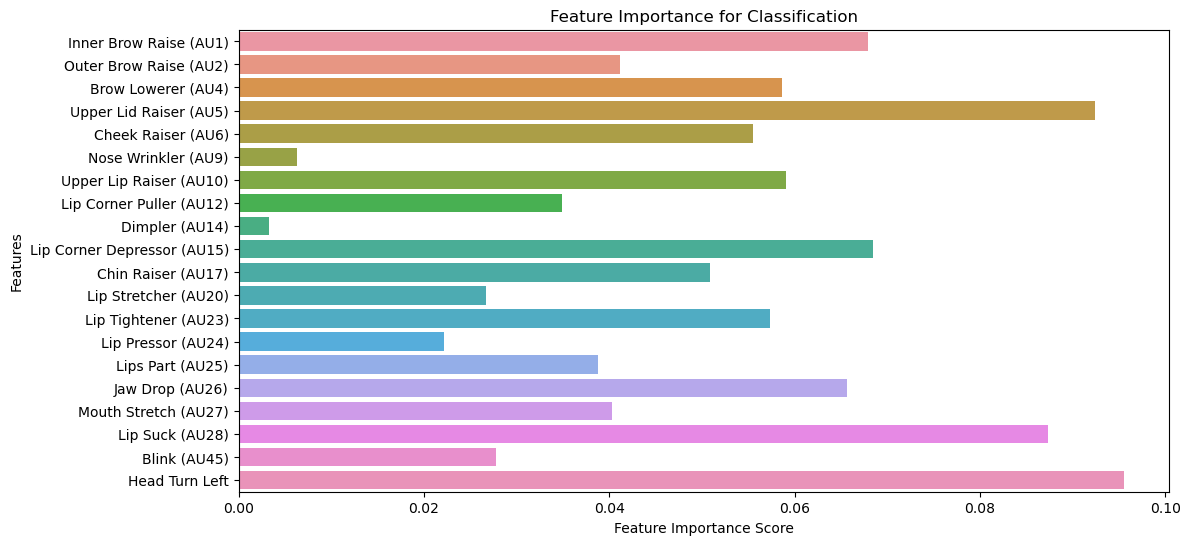


Top 10 Important Features:
 Head Turn Left                 0.138560
Upper Lid Raiser (AU5)         0.136500
Lip Suck (AU28)                0.134513
Lip Corner Depressor (AU15)    0.129840
Cheek Raiser (AU6)             0.103879
Chin Raiser (AU17)             0.098433
Brow Lowerer (AU4)             0.095014
Upper Lip Raiser (AU10)        0.083960
Inner Brow Raise (AU1)         0.074602
Jaw Drop (AU26)                0.059316
dtype: float64


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split

# Load dataset
file_path = r"C:\Gilanie Data\Datasets\Depression\Akhtar Saeed Clinic\AUs\Combined_DrAkhtarSaeedClinic_Normal_Mild_Moderate_Severe.csv"
df = pd.read_csv(file_path)

# Identify feature columns (excluding 'Class')
feature_columns = [col for col in df.columns if col != "Class"]

# Convert feature columns to float
df[feature_columns] = df[feature_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing Class labels
df = df.dropna(subset=['Class'])

# Convert 'Class' to categorical if not numeric
if df['Class'].dtype == object:
    df['Class'] = df['Class'].astype('category').cat.codes  # Convert categories to numbers

# Drop rows with missing feature values
df = df.dropna()

# Split features and target
X = df[feature_columns]
y = df["Class"]

# Train a Random Forest model to get feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
feature_importance = rf.feature_importances_

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance, y=feature_columns)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance for Classification")
plt.show()

# Compute Mutual Information
mi = mutual_info_classif(X, y, random_state=42)
mi_series = pd.Series(mi, index=feature_columns).sort_values(ascending=False)

# Print Top 10 Important Features
print("\nTop 10 Important Features:\n", mi_series.head(10))


In [3]:
print("\nTop 20 Important Features:\n", mi_series.head(20))


Top 20 Important Features:
 Head Turn Left                 0.138560
Upper Lid Raiser (AU5)         0.136500
Lip Suck (AU28)                0.134513
Lip Corner Depressor (AU15)    0.129840
Cheek Raiser (AU6)             0.103879
Chin Raiser (AU17)             0.098433
Brow Lowerer (AU4)             0.095014
Upper Lip Raiser (AU10)        0.083960
Inner Brow Raise (AU1)         0.074602
Jaw Drop (AU26)                0.059316
Lip Tightener (AU23)           0.057879
Lip Pressor (AU24)             0.052416
Outer Brow Raise (AU2)         0.046801
Blink (AU45)                   0.038683
Lip Stretcher (AU20)           0.038264
Nose Wrinkler (AU9)            0.035026
Lip Corner Puller (AU12)       0.029534
Mouth Stretch (AU27)           0.028236
Lips Part (AU25)               0.023827
Dimpler (AU14)                 0.021160
dtype: float64


In [4]:
#Correlation Analysis (Numerical Features Only)
#We will compute the Pearson correlation coefficient between each numerical attribute and the "Class" attribute.

C:\Users\acpgi\AppData\Local\Temp\ipykernel_24984\693353699.py:7: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


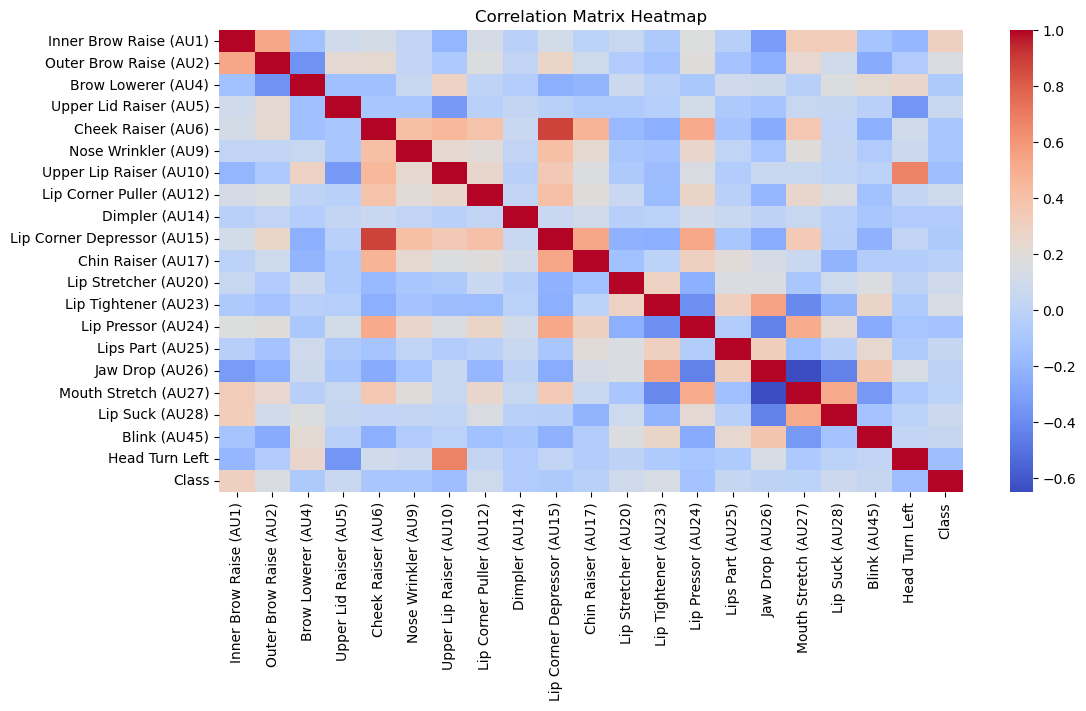


Top 20 Features Correlated with Class:
 Inner Brow Raise (AU1)         0.308168
Outer Brow Raise (AU2)         0.146271
Lip Tightener (AU23)           0.135928
Lip Stretcher (AU20)           0.086687
Lip Corner Puller (AU12)       0.078807
Lip Suck (AU28)                0.067778
Upper Lid Raiser (AU5)         0.059193
Blink (AU45)                   0.041052
Lips Part (AU25)               0.039312
Jaw Drop (AU26)               -0.001785
Mouth Stretch (AU27)          -0.006946
Chin Raiser (AU17)            -0.025476
Dimpler (AU14)                -0.065939
Brow Lowerer (AU4)            -0.077854
Lip Corner Depressor (AU15)   -0.081322
Nose Wrinkler (AU9)           -0.097982
Cheek Raiser (AU6)            -0.104259
Lip Pressor (AU24)            -0.129427
Upper Lip Raiser (AU10)       -0.156068
Head Turn Left                -0.157461
Name: Class, dtype: float64


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = r"C:\Gilanie Data\Datasets\Depression\Akhtar Saeed Clinic\AUs\Combined_DrAkhtarSaeedClinic_Normal_Mild_Moderate_Severe.csv"
df = pd.read_csv(file_path)

# Identify feature columns (excluding 'Class')
feature_columns = [col for col in df.columns if col != "Class"]

# Convert feature columns to float
df[feature_columns] = df[feature_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing Class labels
df = df.dropna(subset=['Class'])

# Convert 'Class' to numeric if it's categorical
if df['Class'].dtype == object:
    df['Class'] = df['Class'].astype('category').cat.codes  

# Compute Pearson correlation
corr_matrix = df.corr()

# Extract correlation of features with Class
corr_with_class = corr_matrix["Class"].drop("Class").sort_values(ascending=False)

# Plot correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Display Top 10 most correlated features
print("\nTop 20 Features Correlated with Class:\n", corr_with_class.head(20))


In [6]:
#Feature Importance using Random Forest
#Now, we use a Random Forest Classifier to identify feature importance.

C:\Users\acpgi\.conda\envs\env4tl\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


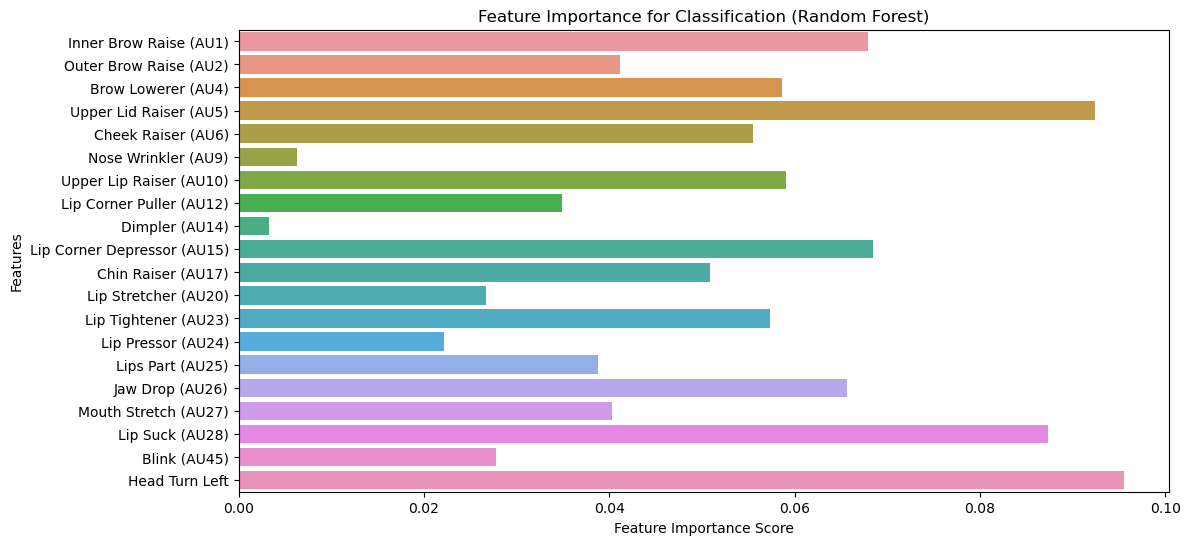


Top 20 Important Features (Random Forest):
 Head Turn Left                 0.095586
Upper Lid Raiser (AU5)         0.092437
Lip Suck (AU28)                0.087323
Lip Corner Depressor (AU15)    0.068462
Inner Brow Raise (AU1)         0.067949
Jaw Drop (AU26)                0.065661
Upper Lip Raiser (AU10)        0.059080
Brow Lowerer (AU4)             0.058596
Lip Tightener (AU23)           0.057389
Cheek Raiser (AU6)             0.055474
Chin Raiser (AU17)             0.050825
Outer Brow Raise (AU2)         0.041132
Mouth Stretch (AU27)           0.040274
Lips Part (AU25)               0.038765
Lip Corner Puller (AU12)       0.034872
Blink (AU45)                   0.027784
Lip Stretcher (AU20)           0.026703
Lip Pressor (AU24)             0.022133
Nose Wrinkler (AU9)            0.006262
Dimpler (AU14)                 0.003294
dtype: float64


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Drop rows with missing feature values
df = df.dropna()

# Split features and target
X = df[feature_columns]
y = df["Class"]

# Train a Random Forest model to get feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
feature_importance = rf.feature_importances_

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance, y=feature_columns)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance for Classification (Random Forest)")
plt.show()

# Display Top 10 Important Features
feature_importance_series = pd.Series(feature_importance, index=feature_columns).sort_values(ascending=False)
print("\nTop 20 Important Features (Random Forest):\n", feature_importance_series.head(20))


In [8]:
#Chi-Square Test for Categorical Feature Selection
#We now use Mutual Information (MI), a non-parametric method that works well for both categorical and continuous data.

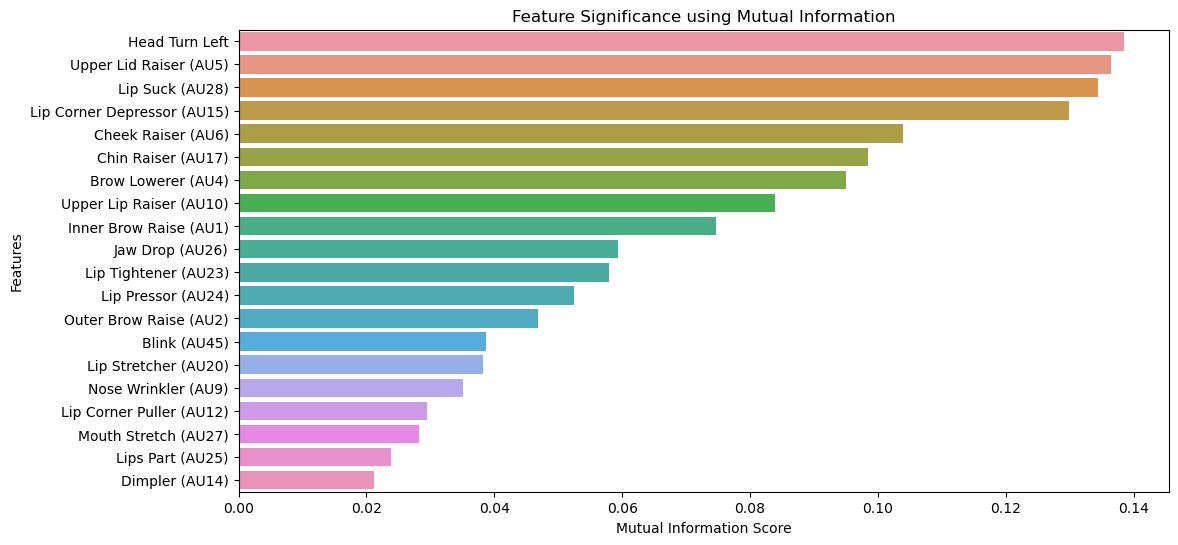


Top 20 Important Features (Mutual Information):
 Head Turn Left                 0.138560
Upper Lid Raiser (AU5)         0.136500
Lip Suck (AU28)                0.134513
Lip Corner Depressor (AU15)    0.129840
Cheek Raiser (AU6)             0.103879
Chin Raiser (AU17)             0.098433
Brow Lowerer (AU4)             0.095014
Upper Lip Raiser (AU10)        0.083960
Inner Brow Raise (AU1)         0.074602
Jaw Drop (AU26)                0.059316
Lip Tightener (AU23)           0.057879
Lip Pressor (AU24)             0.052416
Outer Brow Raise (AU2)         0.046801
Blink (AU45)                   0.038683
Lip Stretcher (AU20)           0.038264
Nose Wrinkler (AU9)            0.035026
Lip Corner Puller (AU12)       0.029534
Mouth Stretch (AU27)           0.028236
Lips Part (AU25)               0.023827
Dimpler (AU14)                 0.021160
dtype: float64


In [9]:
from sklearn.feature_selection import mutual_info_classif

# Compute Mutual Information
mi = mutual_info_classif(X, y, random_state=42)
mi_series = pd.Series(mi, index=feature_columns).sort_values(ascending=False)

# Plot Mutual Information Scores
plt.figure(figsize=(12, 6))
sns.barplot(x=mi_series, y=mi_series.index)
plt.xlabel("Mutual Information Score")
plt.ylabel("Features")
plt.title("Feature Significance using Mutual Information")
plt.show()

# Display Top 20 Important Features
print("\nTop 20 Important Features (Mutual Information):\n", mi_series.head(20))

In [10]:
#Data Preprocessing

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
file_path = r"C:\Gilanie Data\Datasets\Depression\Akhtar Saeed Clinic\AUs\Combined_DrAkhtarSaeedClinic_Normal_Mild_Moderate_Severe.csv"
df = pd.read_csv(file_path)

# Identify feature columns (excluding 'Class')
feature_columns = [col for col in df.columns if col != "Class"]

# Convert feature columns to float
df[feature_columns] = df[feature_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing Class labels
df = df.dropna(subset=['Class'])

# Convert 'Class' to numeric if it's categorical
if df['Class'].dtype == object:
    df['Class'] = df['Class'].astype('category').cat.codes  

# Drop rows with missing feature values
df = df.dropna()

# Split features and target
X = df[feature_columns]
y = df["Class"]

# Standardize features for better performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

C:\Users\acpgi\AppData\Local\Temp\ipykernel_24984\3244951164.py:7: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [12]:
#Train Multiple Classification Models
# We will try three different models:
# ✔ Logistic Regression (Baseline model)
# ✔ Random Forest (Powerful for structured data)
# ✔ Support Vector Machine (SVM) (Strong for high-dimensional data)

Logistic Regression Accuracy: 0.7043
Random Forest Accuracy: 0.9311
SVM Accuracy: 0.7125

Classification Report (Random Forest):
               precision    recall  f1-score   support

           1       0.95      0.79      0.86     10647
           2       0.91      0.98      0.94     29063
           3       0.98      0.95      0.97      7760
           4       0.95      0.93      0.94      8888

    accuracy                           0.93     56358
   macro avg       0.95      0.91      0.93     56358
weighted avg       0.93      0.93      0.93     56358



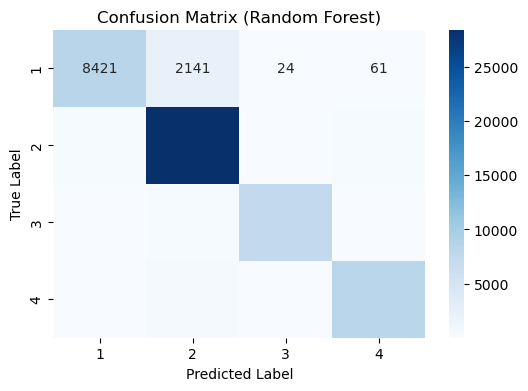

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize models
log_reg = LogisticRegression(max_iter=1000, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(kernel='linear', random_state=42)

# Train models
log_reg.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
svm_clf.fit(X_train, y_train)

# Predictions
y_pred_log = log_reg.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)
y_pred_svm = svm_clf.predict(X_test)

# Print Accuracy Scores
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log):.4f}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")

# Print Classification Report for Best Model
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues", xticklabels=set(y), yticklabels=set(y))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Random Forest)")
plt.show()


In [14]:
#Adding Hyperparameter Tuning for Better Performance
#We will use GridSearchCV to optimize hyperparameters for Random Forest and SVM.

In [15]:
#Hyperparameter Tuning with GridSearchCV
# We tune the following:
# ✔ Random Forest: n_estimators, max_depth, min_samples_split
# ✔ SVM: C, kernel, gamma

In [16]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids for Random Forest and SVM
rf_param_grid = {
    'n_estimators': [50, 100, 200],   # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10]   # Minimum samples required to split an internal node
}

svm_param_grid = {
    'C': [0.1, 1, 10],         # Regularization parameter
    'kernel': ['linear', 'rbf'], # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Perform Grid Search for Random Forest
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, n_jobs=-1, verbose=1)
rf_grid_search.fit(X_train, y_train)

# Perform Grid Search for SVM
svm_grid_search = GridSearchCV(SVC(random_state=42), svm_param_grid, cv=5, n_jobs=-1, verbose=1)
svm_grid_search.fit(X_train, y_train)

# Get Best Parameters
print("Best Random Forest Parameters:", rf_grid_search.best_params_)
print("Best SVM Parameters:", svm_grid_search.best_params_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Random Forest Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best SVM Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


In [17]:
# Train Models with Best Hyperparameters
# Now, we train Random Forest and SVM with the optimized parameters.


Random Forest (Optimized) Accuracy: 0.9324319528727066

SVM (Optimized) Accuracy: 0.9462543028496399

Classification Report (Optimized Random Forest):
               precision    recall  f1-score   support

           1       0.95      0.79      0.87     10647
           2       0.91      0.98      0.94     29063
           3       0.98      0.96      0.97      7760
           4       0.95      0.93      0.94      8888

    accuracy                           0.93     56358
   macro avg       0.95      0.91      0.93     56358
weighted avg       0.93      0.93      0.93     56358



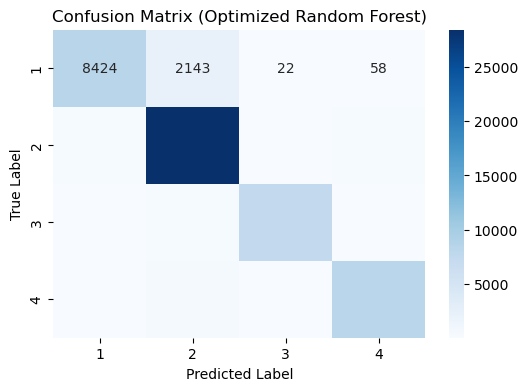

In [18]:
# Train the best Random Forest model
best_rf = RandomForestClassifier(**rf_grid_search.best_params_, random_state=42)
best_rf.fit(X_train, y_train)

# Train the best SVM model
best_svm = SVC(**svm_grid_search.best_params_, random_state=42)
best_svm.fit(X_train, y_train)

# Predictions
y_pred_rf_best = best_rf.predict(X_test)
y_pred_svm_best = best_svm.predict(X_test)

# Evaluate Performance
print("\nRandom Forest (Optimized) Accuracy:", accuracy_score(y_test, y_pred_rf_best))
print("\nSVM (Optimized) Accuracy:", accuracy_score(y_test, y_pred_svm_best))

# Display Classification Report for Best Model
print("\nClassification Report (Optimized Random Forest):\n", classification_report(y_test, y_pred_rf_best))

# Plot Confusion Matrix for Best Model
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf_best), annot=True, fmt="d", cmap="Blues", xticklabels=set(y), yticklabels=set(y))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Optimized Random Forest)")
plt.show()


In [19]:
# Data Preprocessing
# We will:
# ✔ Convert non-numeric values to floating points.
# ✔ Remove empty rows.
# ✔ Standardize the features.
# ✔ Split into training and testing sets.

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
file_path = r"C:\Gilanie Data\Datasets\Depression\Akhtar Saeed Clinic\AUs\Combined_DrAkhtarSaeedClinic_Normal_Mild_Moderate_Severe.csv"
df = pd.read_csv(file_path)

# Identify feature columns (excluding 'Class')
feature_columns = [col for col in df.columns if col != "Class"]

# Convert feature columns to float
df[feature_columns] = df[feature_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing Class labels
df = df.dropna(subset=['Class'])

# Convert 'Class' to numeric if it's categorical
if df['Class'].dtype == object:
    df['Class'] = df['Class'].astype('category').cat.codes  

# Drop rows with missing feature values
df = df.dropna()

# Split features and target
X = df[feature_columns]
y = df["Class"]

# Standardize features for better performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print("✅ Data Preprocessing Complete! Ready for model training.")


C:\Users\acpgi\AppData\Local\Temp\ipykernel_24984\4036239776.py:7: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


✅ Data Preprocessing Complete! Ready for model training.


In [21]:
# Train Initial Models
# We will train Logistic Regression, Random Forest, and SVM to get baseline accuracy.

Logistic Regression Accuracy: 0.6721
Random Forest Accuracy: 0.9326
SVM Accuracy: 0.6932

Classification Report (Random Forest):
               precision    recall  f1-score   support

           1       0.95      0.85      0.89     14787
           2       0.91      0.98      0.94     29063
           3       0.99      0.95      0.97      7760
           4       0.95      0.92      0.93      8888

    accuracy                           0.93     60498
   macro avg       0.95      0.92      0.93     60498
weighted avg       0.93      0.93      0.93     60498



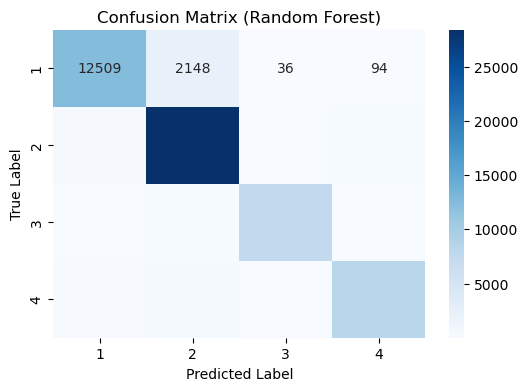

✅ Initial Models Trained! Proceeding to Hyperparameter Tuning.


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize models
log_reg = LogisticRegression(max_iter=1000, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(kernel='linear', random_state=42)

# Train models
log_reg.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
svm_clf.fit(X_train, y_train)

# Predictions
y_pred_log = log_reg.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)
y_pred_svm = svm_clf.predict(X_test)

# Print Accuracy Scores
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log):.4f}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")

# Print Classification Report for Best Model
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix for Random Forest
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues", xticklabels=set(y), yticklabels=set(y))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Random Forest)")
plt.show()

print("✅ Initial Models Trained! Proceeding to Hyperparameter Tuning.")


In [23]:
# Hyperparameter Tuning (Random Forest & SVM)
# Now, we optimize Random Forest and SVM using GridSearchCV.

In [24]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids for Random Forest and SVM
rf_param_grid = {
    'n_estimators': [50, 100, 200],   # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10]   # Minimum samples required to split an internal node
}

svm_param_grid = {
    'C': [0.1, 1, 10],         # Regularization parameter
    'kernel': ['linear', 'rbf'], # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Perform Grid Search for Random Forest
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, n_jobs=-1, verbose=1)
rf_grid_search.fit(X_train, y_train)

# Perform Grid Search for SVM
svm_grid_search = GridSearchCV(SVC(random_state=42), svm_param_grid, cv=5, n_jobs=-1, verbose=1)
svm_grid_search.fit(X_train, y_train)

# Get Best Parameters
print("Best Random Forest Parameters:", rf_grid_search.best_params_)
print("Best SVM Parameters:", svm_grid_search.best_params_)

print("✅ Hyperparameter Tuning Complete! Proceeding to Train Optimized Models.")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Random Forest Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best SVM Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
✅ Hyperparameter Tuning Complete! Proceeding to Train Optimized Models.


In [25]:
# Train & Evaluate Optimized Models
# Now, we train the models with the best parameters and check their accuracy.


Random Forest (Optimized) Accuracy: 0.9336176402525703

SVM (Optimized) Accuracy: 0.9458825085126781

Classification Report (Optimized Random Forest):
               precision    recall  f1-score   support

           1       0.95      0.85      0.90     14787
           2       0.91      0.98      0.94     29063
           3       0.99      0.95      0.97      7760
           4       0.95      0.92      0.94      8888

    accuracy                           0.93     60498
   macro avg       0.95      0.92      0.94     60498
weighted avg       0.94      0.93      0.93     60498



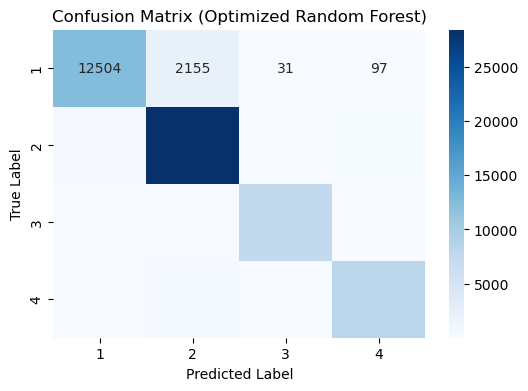

✅ Optimized Models Trained! Ready for Advanced Techniques like XGBoost.


In [26]:
# Train the best Random Forest model
best_rf = RandomForestClassifier(**rf_grid_search.best_params_, random_state=42)
best_rf.fit(X_train, y_train)

# Train the best SVM model
best_svm = SVC(**svm_grid_search.best_params_, random_state=42)
best_svm.fit(X_train, y_train)

# Predictions
y_pred_rf_best = best_rf.predict(X_test)
y_pred_svm_best = best_svm.predict(X_test)

# Evaluate Performance
print("\nRandom Forest (Optimized) Accuracy:", accuracy_score(y_test, y_pred_rf_best))
print("\nSVM (Optimized) Accuracy:", accuracy_score(y_test, y_pred_svm_best))

# Display Classification Report for Best Model
print("\nClassification Report (Optimized Random Forest):\n", classification_report(y_test, y_pred_rf_best))

# Plot Confusion Matrix for Best Model
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf_best), annot=True, fmt="d", cmap="Blues", xticklabels=set(y), yticklabels=set(y))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Optimized Random Forest)")
plt.show()

print("✅ Optimized Models Trained! Ready for Advanced Techniques like XGBoost.")


In [27]:
# Train XGBoost for Even Better Accuracy
# XGBoost is a powerful boosting algorithm that often outperforms other classifiers.

In [31]:
# Adjust class labels to start from 0
y_train = y_train - y_train.min()
y_test = y_test - y_test.min()

# Train XGBoost Model
xgb_clf = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=10, random_state=42)
xgb_clf.fit(X_train, y_train)

# Predictions (adjust labels back to original scale)
y_pred_xgb = xgb_clf.predict(X_test) + y_test.min()




XGBoost Accuracy: 0.9347085854077821

Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.95      0.85      0.90     14787
           1       0.91      0.97      0.94     29063
           2       0.98      0.96      0.97      7760
           3       0.95      0.93      0.94      8888

    accuracy                           0.93     60498
   macro avg       0.95      0.93      0.94     60498
weighted avg       0.94      0.93      0.93     60498



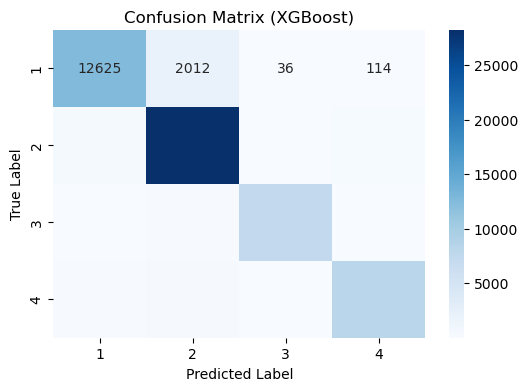

✅ XGBoost Model Trained! You can now compare all models.


In [32]:
from xgboost import XGBClassifier

# Train XGBoost Model
xgb_clf = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=10, random_state=42)
xgb_clf.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_clf.predict(X_test)

# Evaluate Performance
print("\nXGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

# Display Classification Report for XGBoost
print("\nClassification Report (XGBoost):\n", classification_report(y_test, y_pred_xgb))

# Plot Confusion Matrix for XGBoost
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt="d", cmap="Blues", xticklabels=set(y), yticklabels=set(y))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (XGBoost)")
plt.show()

print("✅ XGBoost Model Trained! You can now compare all models.")


In [33]:
# Cross-Validation for Model Stability
# We will perform 5-fold cross-validation on:
# Random Forest (Optimized)
# SVM (Optimized)
# XGBoost

In [34]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

# Define Stratified K-Fold Cross Validation (5 splits)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Function to perform cross-validation and print mean accuracy
def cross_validate_model(model, X, y, model_name):
    scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
    print(f"\n{model_name} - Cross-Validation Results:")
    print(f"Accuracy Scores: {scores}")
    print(f"Mean Accuracy: {np.mean(scores):.4f} ± {np.std(scores):.4f}")

# Perform Cross-Validation on Optimized Random Forest
cross_validate_model(best_rf, X_scaled, y, "Random Forest (Optimized)")

# Perform Cross-Validation on Optimized SVM
cross_validate_model(best_svm, X_scaled, y, "SVM (Optimized)")

# Perform Cross-Validation on XGBoost
cross_validate_model(xgb_clf, X_scaled, y, "XGBoost")



Random Forest (Optimized) - Cross-Validation Results:
Accuracy Scores: [0.93212999 0.93350193 0.93239334 0.93351736 0.93108749]
Mean Accuracy: 0.9325 ± 0.0009

SVM (Optimized) - Cross-Validation Results:
Accuracy Scores: [0.94619657 0.94672551 0.94550143 0.94498901 0.9453196 ]
Mean Accuracy: 0.9457 ± 0.0006


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\acpgi\.conda\envs\env4tl\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\acpgi\.conda\envs\env4tl\lib\site-packages\xgboost\core.py", line 730, in inner_f
    return func(**kwargs)
  File "C:\Users\acpgi\.conda\envs\env4tl\lib\site-packages\xgboost\sklearn.py", line 1471, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [1 2 3 4]


In [ ]:
# Feature Importance Analysis
# We will use three different methods to analyze feature importance:

# Random Forest Feature Importance 
# SHAP (SHapley Additive Explanations) Values 
# XGBoost Feature Importance 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import shap

# 1️⃣ Random Forest Feature Importance
rf_importances = best_rf.feature_importances_
features = X.columns  # Get feature names

# Plot Feature Importance (Random Forest)
plt.figure(figsize=(12, 6))
sorted_indices = np.argsort(rf_importances)[::-1]
plt.bar(range(len(features)), rf_importances[sorted_indices], align="center")
plt.xticks(range(len(features)), np.array(features)[sorted_indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance (Random Forest)")
plt.show()

# 2️⃣ SHAP Values Analysis
explainer = shap.Explainer(best_rf, X_scaled)
shap_values = explainer(X_scaled)

# Summary Plot of SHAP Values
shap.summary_plot(shap_values, X_scaled, feature_names=features)

# 3️⃣ XGBoost Feature Importance
xgb_importances = xgb_clf.feature_importances_

plt.figure(figsize=(12, 6))
sorted_indices = np.argsort(xgb_importances)[::-1]
plt.bar(range(len(features)), xgb_importances[sorted_indices], align="center")
plt.xticks(range(len(features)), np.array(features)[sorted_indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance (XGBoost)")
plt.show()
